In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('ipl data.csv')

In [3]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Eda**

In [4]:
df.shape


(756, 18)

In [5]:
# How many years of data do we have
# 2008 to 2019 12 year, most matches were played in year 2013
df['season'].value_counts().sort_index()


2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: season, dtype: int64

In [6]:
# getting team names per year as some teams were banned in some years

df.groupby('season')['team1'].unique()

season
2008    [Kolkata Knight Riders, Chennai Super Kings, R...
2009    [Mumbai Indians, Royal Challengers Bangalore, ...
2010    [Kolkata Knight Riders, Mumbai Indians, Kings ...
2011    [Chennai Super Kings, Deccan Chargers, Kochi T...
2012    [Chennai Super Kings, Kolkata Knight Riders, P...
2013    [Delhi Daredevils, Royal Challengers Bangalore...
2014    [Kolkata Knight Riders, Delhi Daredevils, Chen...
2015    [Mumbai Indians, Chennai Super Kings, Rajastha...
2016    [Mumbai Indians, Delhi Daredevils, Kings XI Pu...
2017    [Sunrisers Hyderabad, Mumbai Indians, Gujarat ...
2018    [Mumbai Indians, Delhi Daredevils, Royal Chall...
2019    [Royal Challengers Bangalore, Sunrisers Hydera...
Name: team1, dtype: object

In [7]:
#getting the city where maximum matches were played
# Mumbai
df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Cuttack             7
Abu Dhabi           7
Port Elizabeth      7
Ranchi              7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [8]:
# getting the frequency of man of match

df['player_of_match'].value_counts()[:10]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

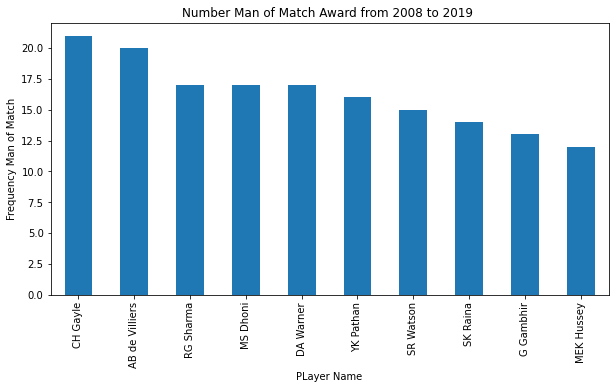

In [9]:
#ploting the reults
plt.figure(figsize=(10,5))
df['player_of_match'].value_counts()[:10].plot(kind='bar')
plt.xlabel('PLayer Name')
plt.ylabel('Frequency Man of Match')
plt.title('Number Man of Match Award from 2008 to 2019 ')
plt.show()

In [10]:
# Extracting records where team won after battting first

df_bat = df[df['win_by_runs'] !=0]
df_bat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


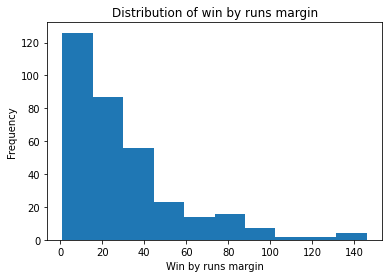

In [11]:
#plotting the distribution of win by runs margin
#There are very less teams in decade of IPL season where they won with margin of more than 100 runs

df_bat['win_by_runs'].plot(kind='hist')
plt.xlabel('Win by runs margin')
plt.title('Distribution of win by runs margin')
plt.show()

In [12]:
#which team does won maximum after batting first
#Mumbai Indians, Chennai Super Kings is close
df_bat['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

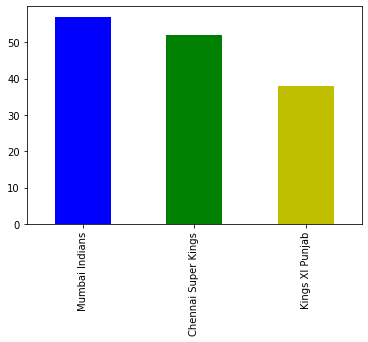

In [13]:
#Ploting the results for top 3 teams
df_bat['winner'].value_counts()[:3].plot(kind='bar',color=['b','g','y'])

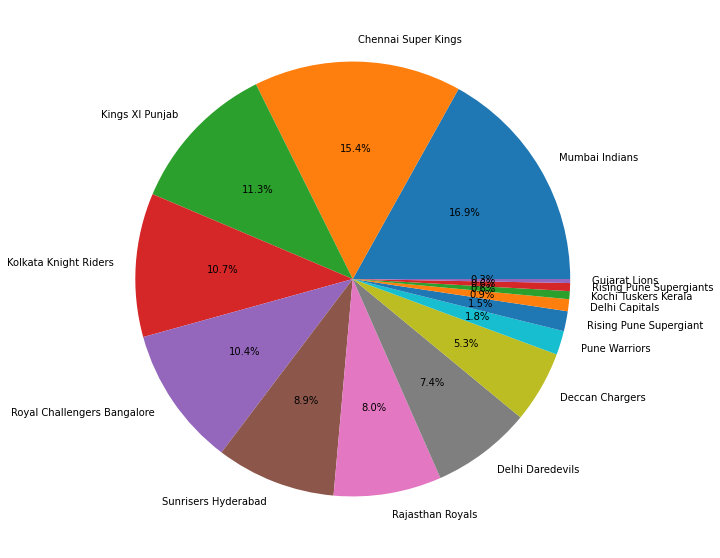

In [14]:
#Creating a Pie chart for overall distribution
plt.figure(figsize=(10,10))
plt.pie(df_bat['winner'].value_counts(),labels=list(df_bat['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [15]:
# Extracting records where team won after battting second
df_bowl = df[df['win_by_wickets'] !=0]
df_bowl.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


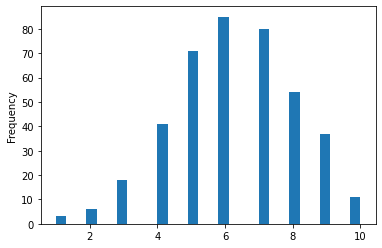

In [16]:
#Distribution of run by wickets
#There are ver less teams who won by 1 wicket, most of them have by 6 wickets in hand
df_bowl['win_by_wickets'].plot(kind='hist',bins=30)

In [17]:
#Maximum wins by team
df_bowl['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Delhi Daredevils               42
Kings XI Punjab                42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Delhi Capitals                  6
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

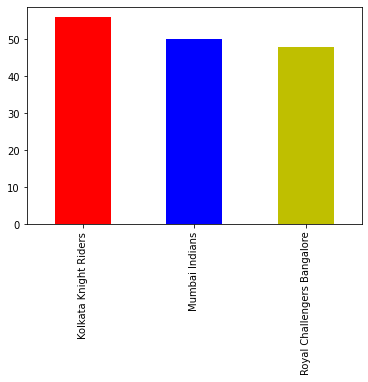

In [18]:
#ploting the results for top 3 teams
df_bowl['winner'].value_counts()[:3].plot(kind='bar',color=['r','b','y'])

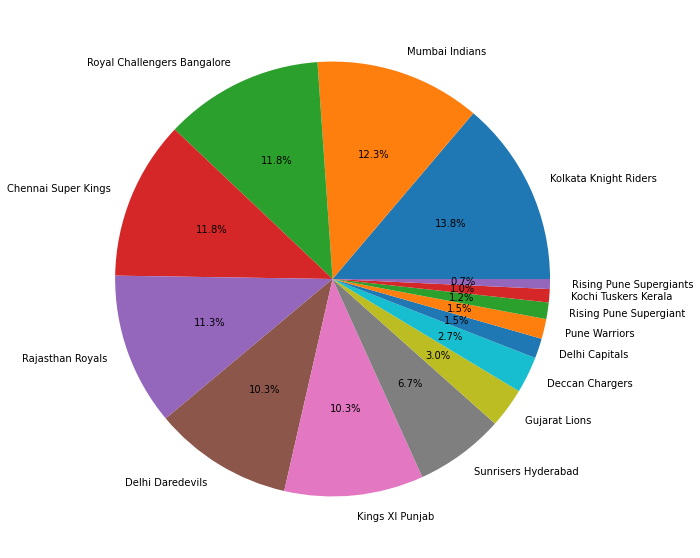

In [19]:
plt.figure(figsize=(10,10))
plt.pie(df_bowl['winner'].value_counts(),labels=list(df_bowl['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [20]:
# Finding relation between winning the toss and winning match
# There is 50 percent chance, following laws of probablity
(np.sum(df['toss_winner'] == df['winner'])/len(df))*100

51.98412698412699

**Conclusion**

**1) Most probable teams to win after batting first:**</br>
a) Mumbai Indians</br>
b) Chennai Super Kings</br>
c)Kings 11 Punjab</br>
</br>
**2)Most probable teams to win after batting second:</br>**
a) Kolkatta Knight Riders</br>
b) Mumbai Indians</br>
c) Royal Chalengers Banglore</br>
</br>

**3) Realtion in winning the toss and winning game**</br>
There is no relation between them the sincerly follow the law of probablities.</br>


